<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*fZsOOTFSFpBcc9DEApeLow.png" width="800" height ="600" />
</div>


### Project Objective 🔭

The objective of this project is to explore how image manipulation techniques, particularly brightness and contrast adjustments, impact the performance of a neural network model in image classification tasks. The project focuses on the following key goals:

1. **Data Augmentation** 🌟: Implement and apply various image manipulation techniques, including brightness and contrast adjustments, to enhance the dataset. This helps simulate different lighting conditions that a model may encounter in real-world scenarios.

2. **Model Training and Evaluation** 🧠: Train a convolutional neural network (CNN) on a dataset of images and evaluate its performance on both normal and manipulated test sets. The model will be trained on standard image data and then tested on images with altered lighting conditions to measure its robustness.

3. **Comparison of Performance Across Test Sets** 📊: Assess and compare the model's accuracy across three distinct test sets:
    - **Normal Test Set** 📸: The original unaltered images.
    - **Manipulated Test Set** 🌅: Images with adjusted brightness and contrast to simulate real-world variability in lighting conditions.
    - **White-Balanced Test Set** 🎨: Images that have undergone white-balancing adjustments to correct for lighting discrepancies.

4. **Performance Analysis and Insights** 🔍: Analyze and interpret the results obtained from the different test sets. The goal is to understand how well the model generalizes to unseen lighting conditions and to identify areas for improvement, such as enhancing model robustness through further data augmentation or model optimization techniques.

This project aims to provide insights into the effectiveness of image preprocessing and data augmentation in building more reliable and adaptable image classification models, especially for use cases involving varying real-world conditions.


# 1. Data Preparation: Handling Class Names from the Dataset 🗂️📸

In this step, we prepare the class names from the dataset for further processing. Specifically, we focus on organizing the class names by converting them to a consistent format.

1. **Selecting Specific Classes**:
   - We begin by defining a list of selected animal classes that we will be working with. These classes include various animals like `collie`, `dolphin`, `elephant`, `giant panda`, and others.

2. **Defining the Dataset Directory**:
   - We specify the directory where the images for each class are stored. In our case, the dataset is located in the `JPEGImages` folder, which contains a directory for each animal class.

3. **Listing All Class Names**:
   - Using the `os.listdir()` function, we retrieve all the folder names from the dataset directory. Each folder name corresponds to a different animal class in the dataset.

4. **Cleaning and Standardizing Class Names**:
   - We then process the class names to ensure consistency:
     - All class names are converted to lowercase to maintain uniformity (e.g., "Elephant" becomes "elephant").
     - Additionally, any `+` characters in the class names are replaced with a space, which ensures proper formatting (e.g., "giant+panda" becomes "giant panda").

5. **Displaying the Cleaned Class Names**:
   - Finally, the cleaned class names are printed to verify that all the names have been processed correctly.

This step is essential for ensuring that the class names are in a clean and consistent format, making it easier to handle the data during further steps in the project.


In [1]:
import os

# Selected classes
selected_classes = ['collie', 'dolphin', 'elephant', 'fox', 'moose', 
                    'rabbit', 'sheep', 'squirrel', 'giant panda', 'polar bear']

# Directory where the dataset is located
dataset_dir = '/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages'

# Get all class directories
all_classes = os.listdir(dataset_dir)

# Convert all class names to lowercase and replace '+' with space
all_classes_lower = [class_name.replace('+', ' ').lower() for class_name in all_classes]

print("All class names:", all_classes_lower)


All class names: ['fox', 'wolf', 'horse', 'antelope', 'hamster', 'skunk', 'chimpanzee', 'lion', 'otter', 'giant panda', 'raccoon', 'hippopotamus', 'bobcat', 'pig', 'rat', 'spider monkey', 'buffalo', 'mouse', 'tiger', 'bat', 'grizzly bear', 'gorilla', 'dalmatian', 'killer whale', 'siamese cat', 'humpback whale', 'chihuahua', 'beaver', 'polar bear', 'german shepherd', 'elephant', 'sheep', 'collie', 'moose', 'zebra', 'seal', 'cow', 'ox', 'mole', 'rabbit', 'giraffe', 'persian cat', 'rhinoceros', 'dolphin', 'blue whale', 'squirrel', 'leopard', 'deer', 'weasel', 'walrus']


## 1.1 Correcting and Matching Selected Class Names with Dataset Directories 🔄📁

1. **Convert the names of selected classes to lowercase and replace '+' with spaces**:
   - This step ensures that the class names from `selected_classes` match the formatted class names in the dataset directory (`all_classes_lower`). It accounts for case differences and replaces any '+' symbols with spaces to handle any inconsistencies in naming.
   
2. **Find matching directories**:
   - For each class in `selected_classes`, we search for directories in `all_classes_lower` that contain the class name as a substring. This is helpful when the dataset class names are slightly different from the selected class names.
   
3. **Take the first match**:
   - When a match is found for a class name, we append the first match to the `corrected_classes` list to ensure we are working with the correct directory name from the dataset.
   
4. **Print the matching class names**:
   - Finally, the script prints out the list of corrected class names that were found in the dataset.


In [2]:
# Convert the selected class names to lowercase and replace '+' with space to match them
corrected_classes = []
for class_name in selected_classes:
    # Find directories that match the selected class name
    matching_classes = [cls for cls in all_classes_lower if class_name.lower() in cls]
    
    if matching_classes:
        corrected_classes.append(matching_classes[0])  # Take the first match

print("Matching class names:", corrected_classes)


Matching class names: ['collie', 'dolphin', 'elephant', 'fox', 'moose', 'rabbit', 'sheep', 'squirrel', 'giant panda', 'polar bear']


# 2. Selecting and Copying the First 650 Images for Each Class ✂️

In this section, we select the first 650 images for each of the matched classes and copy them into a new directory. 

1. **Output Directory Creation**: First, we check if the output directory exists, and if not, we create it using `os.makedirs`.
   
2. **Iterating Through Each Class**: For each class in the corrected list of selected classes, we:
   - Construct the path to the original class directory.
   - List all image files within that directory.
   - Select the first 650 images from the list.

3. **Creating Class-Specific Folders**: We create individual subdirectories for each class within the output directory if they don't already exist.

4. **Copying the Selected Images**: Finally, we copy the selected 650 images from the original directory to the respective class-specific subdirectory in the output directory using `shutil.copy`.

By the end of this process, we will have a subset of 650 images from each of the selected classes stored in a new directory structure.


In [3]:
import shutil

# Select the first 650 images for 10 classes and copy them
output_dir = '/kaggle/working/processed_data'

# Create the directories if they do not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for class_name in corrected_classes:
    class_path = os.path.join(dataset_dir, class_name.replace(' ', '+'))  # Replacing the space with '+' as in the original name
    images = os.listdir(class_path)
    
    # Select the first 650 images
    images = images[:650]
    
    # Create a subfolder for each class
    class_output_dir = os.path.join(output_dir, class_name)
    if not os.path.exists(class_output_dir):
        os.makedirs(class_output_dir)

    # Copy the images
    for image_name in images:
        src = os.path.join(class_path, image_name)
        dest = os.path.join(class_output_dir, image_name)
        shutil.copy(src, dest)

print("The first 650 images have been selected and copied.")


The first 650 images have been selected and copied.


## 2.1 Image Processing and Normalization 🖼️🔧

This code performs image processing and normalization on a dataset of animal images, resizing the images to a target size and normalizing the pixel values. The dataset consists of images from different animal classes, and the goal is to prepare the images for training a machine learning model.

### Steps:

1. **Import Required Libraries**:
   - `cv2` (OpenCV): Used for image reading and resizing.
   - `numpy`: Used for array operations.
   - `os`: Used for file and directory operations.

2. **Set Target Image Size**:
   - `image_size = (224, 224)`: The target size for the images is set to 224x224 pixels. This is a common input size for image classification models like CNNs.

3. **Set Dataset Directory**:
   - `dataset_dir = '/kaggle/working/processed_data'`: The directory where the images are stored.

4. **Initialize Lists for Storing Data**:
   - `X = []`: A list to store the processed images.
   - `y = []`: A list to store the corresponding labels for the images.

5. **Label the Selected Classes**:
   - A dictionary `labels` maps class names to numeric labels. The 10 classes are:
     - Collie: 0
     - Dolphin: 1
     - Elephant: 2
     - Fox: 3
     - Moose: 4
     - Rabbit: 5
     - Sheep: 6
     - Squirrel: 7
     - Giant Panda: 8
     - Polar Bear: 9

6. **Process Images for Each Class**:
   - For each class, the code loops through the images in the class directory, reads each image, resizes it to the target size, and normalizes the pixel values (scaling the pixel values to the range [0, 1]).
   - `cv2.imread(image_path)`: Reads an image from the specified path.
   - `cv2.resize(img, image_size)`: Resizes the image to the target size.
   - `img_resized / 255.0`: Normalizes the image by dividing each pixel value by 255.

7. **Store Processed Images and Labels**:
   - The processed image and its corresponding label are appended to the lists `X` and `y`.

8. **Convert Lists to NumPy Arrays**:
   - `X = np.array(X)`: Converts the list of images to a NumPy array.
   - `y = np.array(y)`: Converts the list of labels to a NumPy array.

9. **Print Success Message**:
   - After processing all images, a success message is printed to indicate that the images have been resized and normalized.

### Output:
- The processed images (`X`) and their corresponding labels (`y`) are now ready for use in training a machine learning model.


In [4]:
import cv2
import numpy as np
import os

# Target image size (e.g., 224x224)
image_size = (224, 224)

# Directory where the data is located
dataset_dir = '/kaggle/working/processed_data'

# Lists to store the images and labels
X = []
y = []

# Labels for the selected classes
labels = {'collie': 0, 'dolphin': 1, 'elephant': 2, 'fox': 3, 'moose': 4, 
          'rabbit': 5, 'sheep': 6, 'squirrel': 7, 'giant panda': 8, 'polar bear': 9}

# Process the images for each class
for class_name, label in labels.items():
    class_dir = os.path.join(dataset_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        
        # Read and resize the image
        img = cv2.imread(image_path)
        img_resized = cv2.resize(img, image_size)  # Resize the image
        
        # Normalize the image
        img_normalized = img_resized / 255.0
        
        # Add the image and its label to the lists
        X.append(img_normalized)
        y.append(label)

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

print("Images have been successfully resized and normalized.")


Images have been successfully resized and normalized.


## 2.2 Splitting the Dataset into Training and Testing Sets 📅🔀

This code snippet splits the dataset into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module.

1. **Importing the `train_test_split` Function**:
   - The `train_test_split` function is imported from the `sklearn.model_selection` library. This function is used to split the dataset into training and testing sets.

2. **Splitting the Data**:
   - `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)`
     - `X` contains the input features (the images in this case), and `y` contains the labels (the corresponding class labels).
     - `test_size=0.3` specifies that 30% of the data will be used for testing, and the remaining 70% will be used for training.
     - `random_state=42` ensures that the split is reproducible, meaning the same split will be generated each time the code is run.

3. **Printing the Confirmation**:
   - `print("Data has been successfully split into training and testing sets.")` confirms that the data has been successfully split into training and testing sets.

### Purpose
This step is crucial for evaluating the performance of a machine learning model by training it on a subset of the data and testing it on a separate, unseen subset.


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data has been successfully split into training and testing sets.")


Data has been successfully split into training and testing sets.


### 2.3 Data Augmentation for Image Preprocessing 🔄📸

This code snippet uses TensorFlow's `ImageDataGenerator` to apply various augmentation techniques to the training images. The augmentation techniques include:

- **Rotation** 🔄: Randomly rotates the image by up to 30 degrees.
- **Width Shift** ↔️: Randomly shifts the image horizontally by 20%.
- **Height Shift** ↕️: Randomly shifts the image vertically by 20%.
- **Shear** 🏗️: Applies shearing transformation, tilting the image by up to 20%.
- **Zoom** 🔍: Random zoom effect, magnifying the image by up to 20%.
- **Horizontal Flip** ↩️: Randomly flips the image horizontally.
- **Fill Mode** 🖼️: Specifies how to fill missing pixel areas after transformation (using the 'nearest' mode).

These augmentations will help increase the diversity of the training data, thus preventing overfitting and improving the model's generalization.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,    # Rotate the image by 30 degrees
    width_shift_range=0.2, # Shift width by 20%
    height_shift_range=0.2, # Shift height by 20%
    shear_range=0.2,      # Apply shearing (tilting)
    zoom_range=0.2,       # Apply zoom (magnification)
    horizontal_flip=True, # Flip horizontally
    fill_mode='nearest'  # Fill missing pixel areas
)

# Applying data augmentation to the training data
datagen.fit(X_train)

print("Data augmentation is ready.")


Data augmentation is ready.


# 3. Convolutional Neural Network (CNN) Model Architecture 🧠🔍

This model is designed for image classification with the following architecture:

## Model Architecture Overview

The model uses Convolutional Neural Network (CNN) layers with multiple convolutional layers, batch normalization, pooling layers, and fully connected layers. It also includes dropout layers to reduce overfitting. The model is optimized with the Adam optimizer and compiled with a learning rate of 0.0005.

### Layer Breakdown

1. **Conv2D Layers** 🌀:
    - The model starts with a sequence of 5 convolutional layers, each followed by Batch Normalization and MaxPooling2D layers.
    - The number of filters increases as the model goes deeper, starting from 32 filters and going up to 512 filters in the fifth convolutional layer.

2. **Batch Normalization** ⚙️:
    - Batch normalization is applied after each convolutional layer to help improve training speed and stability.

3. **MaxPooling2D Layers** 🔽:
    - After each convolutional layer, MaxPooling2D is applied to downsample the spatial dimensions of the feature maps and reduce computational complexity.

4. **Global Average Pooling** 🌐:
    - Replaces the fully connected layers with a `GlobalAveragePooling2D` layer that performs average pooling on the feature maps, reducing the model complexity and helping prevent overfitting.

5. **Fully Connected Layers** 🔗:
    - The model includes two fully connected `Dense` layers:
        - The first Dense layer has 2048 neurons, followed by a `Dropout` layer with a rate of 0.4.
        - The second Dense layer has 1024 neurons, also followed by a `Dropout` layer with a rate of 0.4.

6. **Output Layer** 🔢:
    - The final output layer has 10 neurons with a `softmax` activation function, as the model is designed for 10-class classification.

7. **Optimizer** ⚡:
    - The model is compiled using the `Adam` optimizer with a learning rate of 0.0005.

### Key Features of the Model:
- **Deep Architecture** 🏗️: The model has a deep structure with increasing complexity in the convolutional layers.
- **Batch Normalization** ⚙️: Helps speed up training and improve generalization.
- **Dropout** 🚫: Applied to fully connected layers to reduce overfitting.
- **Global Average Pooling** 🌐: Reduces overfitting by reducing the number of parameters in the final layers.

### Model Summary:
The model is designed to handle 10-class image classification tasks. By applying deeper layers, dropout regularization, batch normalization, and global average pooling, it aims to achieve high performance while minimizing overfitting.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Creating the model
model = Sequential()

# First convolutional layer, batch normalization, and pooling layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())  # Adding batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer, batch normalization, and pooling layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer, batch normalization, and pooling layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional layer, batch normalization, and pooling layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth convolutional layer, batch normalization, and pooling layer
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Global Average Pooling layer
model.add(GlobalAveragePooling2D())

# Fully connected layers with a large number of neurons
model.add(Dense(2048, activation='relu'))  # Fully connected layer with more neurons
model.add(Dropout(0.4))  # Dropout rate set to 0.4 to prevent overfitting
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))  # Dropout rate set to 0.4

# Output layer with 10 units (for 10 classes)
model.add(Dense(10, activation='softmax'))

# Compiling the model with Adam optimizer and a lower learning rate
optimizer = Adam(learning_rate=0.0005)  # Lower learning rate to improve training stability
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary to display the model architecture
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,731,594 (18.05 MB)

 Trainable params: 4,729,610 (18.04 MB)

 Non-trainable params: 1,984 (7.75 KB)

## 3.1 One-Hot Encoding of y_test Labels 🔠

This code converts the `y_test` labels into a one-hot encoded format for multi-class classification tasks. One-hot encoding is a common technique used for converting categorical labels into a binary matrix, which is necessary for classification models.

### Code Explanation:

- **to_categorical(y_test, num_classes=10)**:
    - The `to_categorical` function is imported from the `tensorflow.keras.utils` module and is used to convert the `y_test` labels into a one-hot encoded matrix.
    - `y_test`: The true labels for the test set.
    - `num_classes=10`: Specifies the number of classes in the dataset (in this case, 10 classes).
  
Each label in `y_test` is transformed into a binary vector, where the index corresponding to the label is set to 1, and all other indices are set to 0.

### Result:
- After applying the `to_categorical` function, `y_test_one_hot` will contain a matrix where each row represents a sample from `y_test`, with a `1` at the index of the correct class and `0` elsewhere.
  
This transformation allows the model to properly compare predictions with the true class labels during training and evaluation. ✅


In [8]:
from tensorflow.keras.utils import to_categorical

# Converting y_test labels to one-hot encoding format
y_test_one_hot = to_categorical(y_test, num_classes=10)

## 3.2 One-Hot Encoding for y_train Labels 🔠

This code converts the `y_train` labels into a one-hot encoded format for multi-class classification tasks. One-hot encoding is crucial for training classification models, as it transforms categorical labels into a binary matrix that can be processed by the model.

### Code Explanation:

- **to_categorical(y_train, num_classes=10)**:
    - The `to_categorical` function from the `tensorflow.keras.utils` module is used to convert the `y_train` labels into a one-hot encoded matrix.
    - `y_train`: The true labels for the training set.
    - `num_classes=10`: Specifies that the dataset contains 10 possible classes (e.g., for a classification problem with 10 different categories).
  
Each label in the `y_train` array is converted into a binary vector of length `num_classes`, where the position corresponding to the label's class is set to `1`, and all other positions are set to `0`. This enables the model to understand that each label corresponds to a specific class.

### Result:
- After applying the `to_categorical` function, the `y_train_one_hot` variable will contain a matrix where each row represents a sample from `y_train`, with a `1` at the index of the correct class and `0` at all other positions. ✅


In [9]:
# Converting y_train labels to one-hot encoding format
y_train_one_hot = to_categorical(y_train, num_classes=10)

# 4. Training the Model 🏋️‍♂️

In this section, we train the model using the `fit()` method and apply real-time data augmentation with `ImageDataGenerator`. We also use the `EarlyStopping` callback to stop training early if the model's performance on the validation set does not improve over a set number of epochs, preventing overfitting and optimizing training efficiency. ⏱️

### Key Elements of the Code:

1. **EarlyStopping Callback ⏸️:**
   - The `EarlyStopping` callback is used to monitor the model’s validation loss (`val_loss`) during training.
   - `monitor='val_loss'`: The validation loss is tracked to detect when the model stops improving.
   - `patience=5`: The training will stop after 5 epochs without improvement in the validation loss.
   - `restore_best_weights=True`: Ensures that the model’s weights are restored to the best state when the validation loss was the lowest.

2. **Data Augmentation 🔄:**
   - The `datagen.flow()` function generates batches of image data with augmentation applied, improving the model’s ability to generalize by introducing variations in the training images.
   - Batch size is set to 32, meaning the model will update its weights after processing 32 images at a time.

3. **Model Training 🧑‍💻:**
   - The model is trained for up to 30 epochs, but due to early stopping, it may stop earlier if no improvement is seen.
   - The training process is monitored with `verbose=2` to display progress after every epoch.
   - The validation data (`X_test`, `y_test_one_hot`) is used to evaluate the model after each epoch.

This setup ensures that the model is trained efficiently with the possibility of early termination if no further improvement is observed, thus optimizing the time spent on training while also avoiding overfitting. ⚡


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping callback to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5,  # Stop after 5 epochs with no improvement
                               restore_best_weights=True)

# Training the model with data augmentation
history = model.fit(
    datagen.flow(X_train, y_train_one_hot, batch_size=32),  # Use data augmentation with batch size of 32
    validation_data=(X_test, y_test_one_hot),  # Validation data with one-hot encoded labels
    epochs=30,  # Train for 30 epochs
    verbose=2,  # Show training progress
    callbacks=[early_stopping]  # Use early stopping to prevent overfitting
)


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734791469.620534      66 service.cc:145] XLA service 0x79b820008bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734791469.620599      66 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734791469.620604      66 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1734791480.862562      66 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


143/143 - 71s - 494ms/step - accuracy: 0.3387 - loss: 1.9354 - val_accuracy: 0.1015 - val_loss: 3.9666
Epoch 2/30
143/143 - 44s - 308ms/step - accuracy: 0.4563 - loss: 1.5780 - val_accuracy: 0.2323 - val_loss: 2.5813
Epoch 3/30
143/143 - 44s - 307ms/step - accuracy: 0.5092 - loss: 1.3912 - val_accuracy: 0.2810 - val_loss: 2.2636
Epoch 4/30
143/143 - 44s - 311ms/step - accuracy: 0.5657 - loss: 1.2594 - val_accuracy: 0.3856 - val_loss: 1.8462
Epoch 5/30
143/143 - 44s - 309ms/step - accuracy: 0.6081 - loss: 1.1484 - val_accuracy: 0.4056 - val_loss: 1.7870
Epoch 6/30
143/143 - 44s - 309ms/step - accuracy: 0.6200 - loss: 1.0883 - val_accuracy: 0.5144 - val_loss: 1.4272
Epoch 7/30
143/143 - 44s - 310ms/step - accuracy: 0.6470 - loss: 1.0242 - val_accuracy: 0.6097 - val_loss: 1.1788
Epoch 8/30
143/143 - 44s - 306ms/step - accuracy: 0.6644 - loss: 0.9745 - val_accuracy: 0.6605 - val_loss: 1.0268
Epoch 9/30
143/143 - 44s - 308ms/step - accuracy: 0.6989 - loss: 0.8967 - val_accuracy: 0.6708 - va

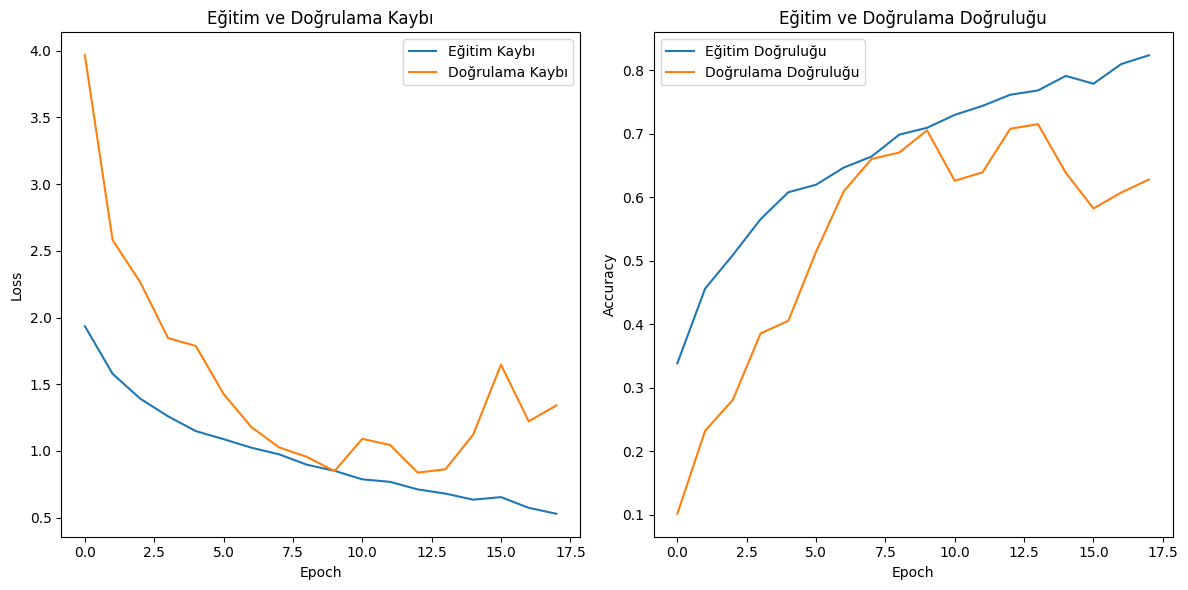

In [11]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybını çizme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 satır, 2 sütun, 1. grafik
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Eğitim ve doğrulama doğruluğunu çizme
plt.subplot(1, 2, 2)  # 1 satır, 2 sütun, 2. grafik
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Grafikler arasındaki boşlukları düzenler
plt.show()


# 5. Image Manipulation: Adjusting Brightness and Contrast 🎨

This section of the code demonstrates how to manipulate the images by adjusting their brightness and contrast using OpenCV's `convertScaleAbs` function. 🖼️

### Code Explanation:

- **`cv2.convertScaleAbs(img, alpha=alpha, beta=beta)`**:
  - This function is used to adjust the brightness and contrast of the input image (`img`).
  - **`alpha`**: Controls the contrast of the image. A value greater than 1.0 increases the contrast, while a value less than 1.0 reduces it.
  - **`beta`**: Controls the brightness of the image. A positive value increases the brightness, and a negative value decreases it.
  
  The function scales the pixel values of the image by the `alpha` factor (contrast adjustment) and adds a constant value `beta` (brightness adjustment). 🌟

- **Loop 🔁**:
  - The code iterates over all the images in the input `images` list (which contains the test set images in this case).
  - For each image, it applies the contrast and brightness adjustments and stores the manipulated image in the `manipulated_images` list.

- **`manipulated_images`**:
  - After applying the transformations, the list `manipulated_images` contains all the modified images, which are returned as a NumPy array. 📸

- **Saving Manipulated Images 💾**:
  - The manipulated images are saved as `.png` files with filenames like `manipulated_image_{idx}.png`, where `{idx}` is the index of the image in the manipulated list.
  - This step is optional and can be omitted if saving the images is not necessary.

### Result:
- The resulting images will have adjusted brightness and contrast, which can be useful for augmenting the dataset or testing the model under different image conditions. 🌈


In [12]:
import cv2
import numpy as np

def get_manipulated_images(images, alpha=1.5, beta=30):
    manipulated_images = []
    for img in images:
        # Adjusting the brightness and contrast of the image
        manipulated = cv2.convertScaleAbs(img, alpha=1.2, beta=10)
        manipulated_images.append(manipulated)
    return np.array(manipulated_images)

# Manipulating the images in the test set
manipulated_test_images = get_manipulated_images(X_test)

# Saving the manipulated images to files (optional)
for idx, img in enumerate(manipulated_test_images):
    cv2.imwrite(f"manipulated_image_{idx}.png", img)


# 6. Evaluating the Model on Manipulated Test Set 🔍

In this section, we evaluate the model's performance on the manipulated test images to observe how the model performs when presented with images that have adjusted brightness and contrast. 💡

### Code Explanation:

- **`model.evaluate(manipulated_test_images, y_test_one_hot, verbose=2)`**:
  - This function evaluates the trained model on the manipulated test set (`manipulated_test_images`).
  - **`manipulated_test_images`**: The manipulated images (those with adjusted brightness and contrast) that were passed through the `get_manipulated_images` function earlier.
  - **`y_test_one_hot`**: The one-hot encoded true labels for the test set. These are used to calculate the loss and accuracy during evaluation.
  - **`verbose=2`**: This argument controls the verbosity of the output. A value of 2 will display a progress bar and additional details during evaluation. 📊
  
  The `evaluate` function returns the model's loss and accuracy on the manipulated test images. The loss is the value of the loss function, and the accuracy is the percentage of correct predictions. 🎯

- **`manipulated_test_results[1]`**:
  - After the evaluation, `manipulated_test_results` stores a list where the first element is the loss value, and the second element is the accuracy value.
  - `manipulated_test_results[1]` refers to the accuracy value of the model on the manipulated test set. 📈

- **`print(f"Manipüle Edilmiş Test Seti Başarı Oranı: {manipulated_test_results[1]*100:.2f}%")`**:
  - This line prints the accuracy of the model on the manipulated test set in percentage format. 📑
  - The accuracy is multiplied by 100 to convert it into a percentage, and the result is formatted to two decimal places using `:.2f`. 🔢

### Result:
- After running this code, the model's accuracy on the manipulated test set will be displayed as a percentage. This allows us to see how well the model handles images with altered brightness and contrast. 🌈


In [13]:
# Testing the model with the manipulated test set
manipulated_test_results = model.evaluate(manipulated_test_images, y_test_one_hot, verbose=2)

print(f"Accuracy on Manipulated Test Set: {manipulated_test_results[1]*100:.2f}%")


61/61 - 2s - 34ms/step - accuracy: 0.0913 - loss: 17.3697
Accuracy on Manipulated Test Set: 9.13%


# 7. Applying White Balance with the Gray World Algorithm ⚖️

The following code implements the **Gray World** algorithm, which is commonly used for white balance adjustment in images. The Gray World algorithm assumes that the average color of a scene is neutral (gray), and adjusts the image so that the average color values across the red, green, and blue channels are balanced. 🎨

### Code Explanation:

#### `gray_world(image)` function:

- **Input**: 
    - The function takes an image in the form of a NumPy array where the three channels (Red, Green, and Blue) are stored in the last dimension. 📸

- **Process**: 
    - The function first calculates the average values of the **Blue**, **Green**, and **Red** channels (`avg_b`, `avg_g`, and `avg_r` respectively).
    - It then computes the overall average color value (`avg_gray`), which is the mean of the three channel averages.
    - Each channel is then scaled by the ratio of the overall average color value to its corresponding average channel value. This process adjusts the color balance. 🔄

- **Output**: 
    - The adjusted image is clipped to ensure that pixel values remain within the valid range [0, 255], and the result is converted back to the uint8 format for proper display. 🎥

#### `get_wb_images(images)` function:

- **Input**: 
    - A list of images (`images`) that needs to be processed with the Gray World algorithm. 🖼️

- **Process**: 
    - This function iterates over all images in the input list, applying the `gray_world()` function to each image. 🔄

- **Output**: 
    - The function returns an array of white-balanced images. 📤

### Applying White Balance to the Manipulated Test Images:

- **`wb_test_images = get_wb_images(manipulated_test_images)`**:
    - This line applies the **Gray World** algorithm to the `manipulated_test_images`. The function `get_wb_images()` is called, which processes the manipulated images and adjusts their color balance using the Gray World algorithm. 🎨
    - The result is stored in the `wb_test_images` variable, which can be used for further analysis or model evaluation. 📊

This technique helps to remove unwanted color casts and improves the overall appearance of images, especially in cases where the lighting conditions are not ideal. 🌅


In [14]:
def gray_world(image):
    """
    Function that applies white balance using the Gray World algorithm.
    """
    result = np.zeros_like(image, dtype=np.float32)
    avg_b = np.mean(image[:, :, 0])  # Average of the Blue channel
    avg_g = np.mean(image[:, :, 1])  # Average of the Green channel
    avg_r = np.mean(image[:, :, 2])  # Average of the Red channel
    
    # Normalizing the average values
    avg_gray = (avg_b + avg_g + avg_r) / 3
    
    result[:, :, 0] = (image[:, :, 0] * (avg_gray / avg_b))  # Blue channel correction
    result[:, :, 1] = (image[:, :, 1] * (avg_gray / avg_g))  # Green channel correction
    result[:, :, 2] = (image[:, :, 2] * (avg_gray / avg_r))  # Red channel correction
    
    return np.clip(result, 0, 255).astype(np.uint8)  # Convert the image back to uint8 format

def get_wb_images(images):
    wb_images = []
    for img in images:
        result = gray_world(img)  # Apply the Gray World algorithm
        wb_images.append(result)
    return np.array(wb_images)

# Applying color constancy to the manipulated test set
wb_test_images = get_wb_images(manipulated_test_images)  # Apply white balance on manipulated test images


# 8. Testing the Model with the White-Balanced Test Set  🔍


This section evaluates the performance of the trained model using the test set that has undergone white balance correction using the Gray World algorithm.


In [15]:
# Testing the model with the white balance applied test set
wb_test_results = model.evaluate(wb_test_images, y_test_one_hot, verbose=2)

print(f"Accuracy on White-Balanced Test Set: {wb_test_results[1]*100:.2f}%")


61/61 - 1s - 15ms/step - accuracy: 0.0872 - loss: 16.7356
Accuracy on White-Balanced Test Set: 8.72%


# 9. Model Evaluation and Comparison on Different Test Sets 📊

This section explains how the model is evaluated on three different test sets: the original test set, the manipulated test set, and the white-balanced test set. After evaluating the model on these datasets, the results are printed and compared to assess the model's performance across different image preprocessing techniques.

In [16]:
# Testing the model with the original test set
original_test_results = model.evaluate(X_test, y_test_one_hot, verbose=2)
manipulated_test_results = model.evaluate(manipulated_test_images, y_test_one_hot, verbose=2)
wb_test_results = model.evaluate(wb_test_images, y_test_one_hot, verbose=2)

# Printing the results
print(f"Accuracy on Normal Test Set: {original_test_results[1]*100:.2f}%")
print(f"Accuracy on Manipulated Test Set: {manipulated_test_results[1]*100:.2f}%")
print(f"Accuracy on White-Balanced Test Set: {wb_test_results[1]*100:.2f}%")

# Comparing the results
results = {
    "Normal Test Set": original_test_results[1] * 100,
    "Manipulated Test Set": manipulated_test_results[1] * 100,
    "White-Balanced Test Set": wb_test_results[1] * 100
}

# Reporting the results
for set_name, accuracy in results.items():
    print(f"{set_name}: {accuracy:.2f}%")

# Comparison of accuracy scores and discussion of potential solutions for low scores if necessary.


61/61 - 1s - 19ms/step - accuracy: 0.7082 - loss: 0.8373
61/61 - 1s - 13ms/step - accuracy: 0.0913 - loss: 17.3697
61/61 - 1s - 13ms/step - accuracy: 0.0872 - loss: 16.7356
Accuracy on Normal Test Set: 70.82%
Accuracy on Manipulated Test Set: 9.13%
Accuracy on White-Balanced Test Set: 8.72%
Normal Test Set: 70.82%
Manipulated Test Set: 9.13%
White-Balanced Test Set: 8.72%


## 9.1 Analysis and Insights 🔍:

Upon analyzing the results, it's evident that there is a significant drop in accuracy when testing on the manipulated and white-balanced test sets compared to the normal test set. Below are some potential reasons for this performance gap and steps that could be taken to improve it.

1. **Generalization Issues in the Model 🧠:**
   The drastic decrease in performance on the manipulated and white-balanced test sets indicates that the model struggles to generalize well under different lighting and contrast conditions. This suggests that the model may have overfitted to the specific conditions present in the training data and isn't robust to variations.

2. **Shift in Data Distribution 📊:**
   The manipulated images likely introduced a shift in data distribution that the model wasn't trained on. As a result, the model's ability to recognize patterns in these altered images decreased significantly, showing its sensitivity to changes in the visual properties of the input.

#### Potential Solutions 🛠️:

1. **Data Augmentation 🌈:**
   - To make the model more robust, I could incorporate more aggressive data augmentation techniques during training, including random brightness, contrast adjustments, and even white-balancing operations. This would help the model learn to adapt to various lighting conditions and increase its generalization capability.

2. **Fine-Tuning the Model 🔧:**
   - Another approach could be to fine-tune the model on a set of manipulated images with different lighting conditions. By retraining or fine-tuning with these variations, the model could better understand the potential changes in image properties.

3. **Regularization Techniques 🧘‍♂️:**
   - Adding more regularization techniques such as dropout or L2 regularization could help the model avoid overfitting to the specific features of the training data and improve its performance on unseen data, including manipulated test sets.

4. **Using Pretrained Models 🤖:**
   - Another solution could be to leverage a pretrained model (such as one based on ImageNet) and fine-tune it on my dataset. Pretrained models often have better generalization capabilities due to their exposure to diverse data during initial training.

5. **Adjusting the Learning Rate ⚙️:**
   - I could experiment with different learning rates or use learning rate schedules to ensure that the model converges better and isn't too sensitive to overfitting.

#### Conclusion 📈:

The results show that the model performs well on the normal test set, but struggles significantly on manipulated and white-balanced sets. Incorporating more diverse data, applying robust augmentation, and tuning the model further should improve its performance across varying conditions, helping the model become more adaptable to real-world variations.
